In [1]:
import numpy as np
#find t from step size
t0=1 #<<t0 is 1
h=2  #<<h is step size 
t_values = np.arange(t0, 5+h, h) #<<t2 is 5
t = [round(i,5) for i in t_values.tolist()]
print("t = np.array(",t,end='')
print(')')

t = np.array( [1, 3, 5])


S0(1< t<=3) = 2.78000 + 19.31250(t-1) + -0.00000(t-1)^2  + -0.63812(t-1)^3
S1(3< t<=5) = 36.30000 + 11.65500(t-3) + -3.82875(t-3)^2  + 0.63812(t-3)^3
A(2) Exact=12.64353
A(2) Euler =  2.31628
Error Euler =  10.32725
A(2) Cubic Spline = 21.45438
Error Cubic Spline=8.81084


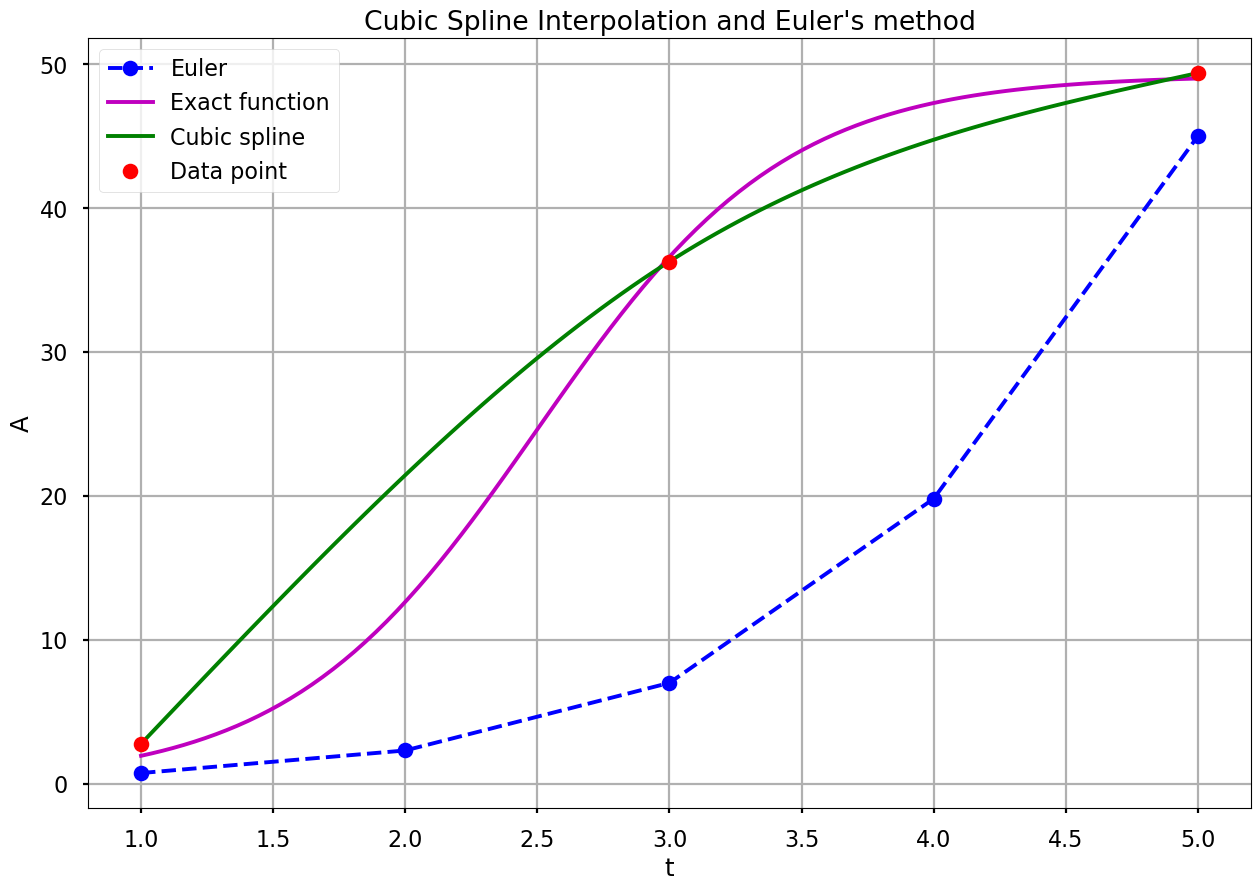

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#Cubic Spline from data point t and a
t = np.array( [ 1,  3, 5]) #t from output1
a = np.array( [ 2.78, 36.30, 49.40]) #a (Area) from experiment
f = CubicSpline(t, a, bc_type='natural') #Cubic Spline Interpolation

#Cubic Spline equation
for j in range(f.c.shape[1]):
    a_j = f.c.item(3, j)
    b_j = f.c.item(2, j)
    c_j = f.c.item(1, j)
    d_j = f.c.item(0, j)
    t_low = t[j]
    t_high = t[j+1]
    
    equation = f'S{j}({t_low}< t<={t_high}) = {a_j:.5f} + {b_j:.5f}(t-{t_low}) + {c_j:.5f}(t-{t_low})^2  + {d_j:.5f}(t-{t_low})^3'
   
    print(equation) #<< Cubic Spline polynomials
    
    
#exact funtion
def z(b):
    return (49.2593*(2.71828**(2.128*b)))/(204.247+(2.71828**(2.128*b))) #<<Exact function in b terms

#A(2) exact
print('A(2) Exact={:.5f}'.format(z(2)))

#plot graph exact funtion
t_plot = np.linspace(t[0], t[-1], 100)

a_exact = (49.2593*(2.71828**(2.128*t_plot)))/(204.247+(2.71828**(2.128*t_plot))) #<<Exact function in t_plot terms for plot graph

#Euler's method
def func( t_euler, a_euler ):
    return a_euler*(2.128-(0.0432*a_euler)) #<<dA/dt in t_euler and a_euler terms 
     

def euler( a0, a_euler, h, t_euler ):
    temp = -0
 

    while a0 < t_euler:
        temp = a_euler
        a_euler =a_euler + h * func(a0, a_euler)
        a0 = a0 + h
#A(2) Euler's method 

    print("A(2) Euler = ","%.5f"% a_euler)
    return a_euler

a0 = 0 #<<<< t=0
b0 = 0.24 #<< A(0)=0.24
h = 1 #<<step size
 
t_euler = 2 #<<approxination Euler A(2)
 
a_euler = euler(a0, b0, h, t_euler)


error = abs(z(2) - a_euler)
#Error Euler's method 
print("Error Euler = ", "%.5f" % error)
#A(2) Cubic spline
print('A(2) Cubic Spline = {:.5f}'.format(f(2)))
#Error Cubic spline
print('Error Cubic Spline={:.5f}'.format(abs(z(2)-f(2))))


plt.style.use('seaborn-poster')


#Euler's method plot graph
f1 = lambda w, s: s*(2.128-(0.0432*s)) #<<dA/dt in s and w terms 
h = 1 #<<step size
w = np.arange(0, 5 + h, h) #<<t0 is 1 ,t2 is 5


s0 = 0.24 #<< A(0)=0.24

s = np.zeros(len(w))
s[0] = s0

for i in range(0, len(w) - 1):
    s[i + 1] = s[i] + h*f1(w[i], s[i])
w_1 = np.where((w >= 1) & (w <= 5))
    
t_new =np.linspace(t[0], t[-1], 100)
a_new = f(t_new)
#plot graph
plt.figure(figsize = (15,10))
plt.grid()
plt.plot(w[w_1], s[w_1], 'bo--', label='Euler')
plt.plot(t_plot,a_exact, 'm',  label='Exact function')
plt.plot(t_new, a_new, 'g', label='Cubic spline')
plt.plot(t, a, 'ro',label='Data point')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('t')
plt.ylabel('A')
plt.legend(loc='upper left')
plt.show()

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( t_euler, a_euler ):
    return a_euler*(2.128-(0.0432*a_euler))  #<<dA/dt in t_euler and a_euler terms 
     

def euler( a0, a_euler, h, t_euler ):
 
    while a0 < t_euler:
        temp = a_euler
        a_euler =a_euler + h * func(a0, a_euler)
        a0 = a0 + h
 

    return a_euler

a0 = 0 #<<t=0
b0 = 0.24 #<< A(0)=0.24
h = 1 #<<step size
 
t_euler_values = np.arange(1, 5+h, h) #<<t0=1 and t2=5

t_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []
error_values=[]

def z(b):
    return (49.2593*(2.71828**(2.128*b)))/(204.247+(2.71828**(2.128*b)))  #<<Exact function in b terms

t = np.array( [ 1,  3, 5]) #t from output1
a = np.array( [ 2.78, 36.30, 49.40])#a (Area) from experiment
cs = CubicSpline(t, a, bc_type='natural')#Cubic Spline Interpolation

for i in np.arange(1, 5+h, h):  #<<t0=1 and t2=5 in step1
    error = abs(z(i)-cs(i))
    error_values.append(float("{:.5f}".format(error)))

for t in t_euler_values:
    a_euler = euler(a0, b0, h, t)
    error = abs(z(t) - a_euler)
    s = np.round(cs(t), 5)
    t_values.append(t)
    euler_values.append(float("{:.5f}".format(a_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))


t_values = [float("{:.5f}".format(t)) for t in t_values]
exact_values = [float("{:.5f}".format(t)) for t in exact_values]
euler_values = [float("{:.5f}".format(t)) for t in euler_values]
error_euler = [float("{:.5f}".format(t)) for t in error_euler]
s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print('{',end='')   
print("'t' : ", t_values,end='')
print(',')

error_eulervalues=[]
errorexactvalues=[]

for t in t_euler_values:
    exact_values.append(round(z(t),5))
    
a = [2.78,np.nan, 36.3,np.nan, 49.4] #a(Area) from experiment at t=[1,3,5]

print("'test' :",a,end='')
print(',')
print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')


for t_euler in t_euler_values:
    t_values.append(round(t_euler, 5))
    a_euler = euler(a0, b0, h, t_euler)
    erroreuler = abs(z(t_euler) - a_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')




for t_euler in t_euler_values:
    s = np.round(cs(t_euler), 5)
    s_values.append(float("{:.5f}".format(s)))
    error_cs.append(abs(z(t_euler)-s))

s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'t' :  [1.0, 2.0, 3.0, 4.0, 5.0],
'test' : [2.78, nan, 36.3, nan, 49.4],
'Exact' : [1.94541, 12.64353, 36.62829, 47.31638, 49.01962],
'Euler' :  [0.24, 0.74823, 2.31628, 7.01356, 19.8134],
'Cubic Spline':  [2.78, 21.45438, 36.3, 44.76438, 49.4],
'Error Euler':  [1.70541, 11.8953, 34.312, 40.30282, 29.20622],
'Error Cubic Spline': [0.83459, 8.81085, 0.32829, 2.552, 0.38038]}


In [4]:
from IPython.display import display
import numpy as np
import pandas as pd
nan=np.nan
# creating a DataFrame
dict ={'t' :  [1.0, 2.0, 3.0, 4.0, 5.0],
'test' : [2.78, nan, 36.3, nan, 49.4],
'Exact' : [1.94541, 12.64353, 36.62829, 47.31638, 49.01962],
'Euler' :  [0.74823, 2.31628, 7.01356, 19.8134, 45.01726],
'Cubic Spline':  [2.78, 21.45438, 36.3, 44.76438, 49.4],
'Error Euler':  [1.19718, 10.32725, 29.61473, 27.50298, 4.00236],
'Error Cubic Spline': [0.83459, 8.81085, 0.32829, 2.552, 0.38038]} #The data from output 3 and the experimental results are summarized in the table.
df = pd.DataFrame(dict)
# displaying the DataFrame
display(df)

,t,test,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,1.0,2.78,1.94541,0.74823,2.78000,1.19718,0.83459
1,2.0,NaN,12.64353,2.31628,21.45438,10.32725,8.81085
2,3.0,36.30,36.62829,7.01356,36.30000,29.61473,0.32829
3,4.0,NaN,47.31638,19.81340,44.76438,27.50298,2.55200
4,5.0,49.40,49.01962,45.01726,49.40000,4.00236,0.38038


In [6]:
import numpy as np

t0=0 #<<t0 is 0
h=20 #<<h is step size 
t_values = np.arange(t0, 60+h, h) #<<t3 is 60
t = [round(i,5) for i in t_values.tolist()]


print("t =",t)

t = [0, 20, 40, 60]


S0(0< t<=20) = 72.00000 + -1.10333(t-0) + -0.00000(t-0)^2  + 0.00026(t-0)^3
S1(20< t<=40) = 52.00000 + -0.79333(t-20) + 0.01550(t-20)^2  + -0.00029(t-20)^3
S2(40< t<=60) = 40.00000 + -0.52333(t-40) + -0.00200(t-40)^2  + 0.00003(t-40)^3
T(20) Exact=49.58527
T(20) Euler =  46.47787
Error Euler =  3.10740
T(20) Cubic Spline = 52.00000
Error Cubic Spline=2.41473


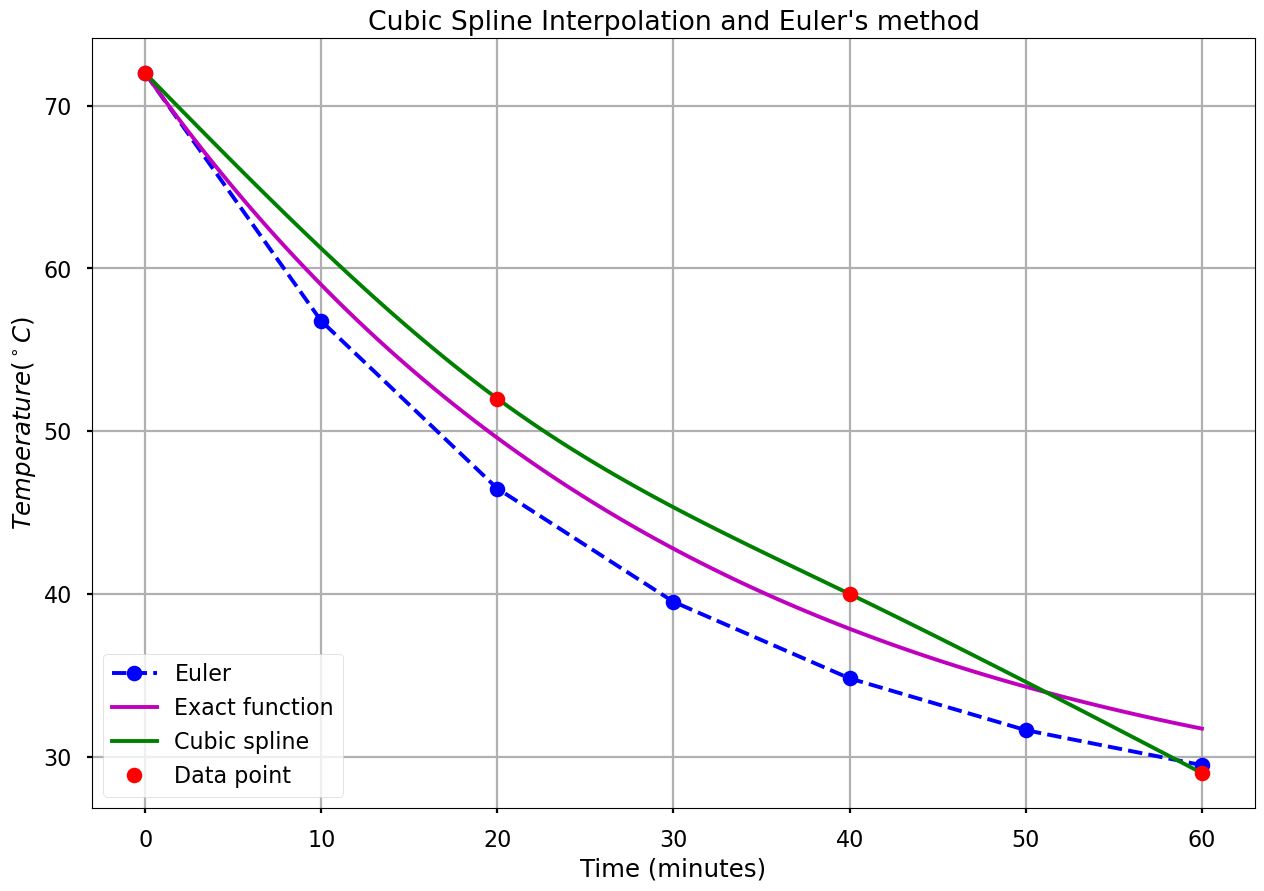

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#Cubic Spline from data point t and y
t = np.array([0,  20, 40,60]) #t from output1
y = np.array( [72,52,40,29])  #T (temperature) from experiment
f = CubicSpline(t, y, bc_type='natural') #Cubic Spline Interpolation

#Cubic Spline equation
for j in range(f.c.shape[1]):
    a_j = f.c.item(3, j)
    b_j = f.c.item(2, j)
    c_j = f.c.item(1, j)
    d_j = f.c.item(0, j)
    t_low = t[j]
    t_high = t[j+1]
    
    equation = f'S{j}({t_low}< t<={t_high}) = {a_j:.5f} + {b_j:.5f}(t-{t_low}) + {c_j:.5f}(t-{t_low})^2  + {d_j:.5f}(t-{t_low})^3'
   
    print(equation) #<< Cubic Spline polynomials
    
    
#exact funtion
def z(a):
    return 47*np.exp(-0.0324*a)+25 #<<Exact function in a terms

#T(20) exact
print('T(20) Exact={:.5f}'.format(z(20)))

#plot graph exact funtion
t_plot = np.linspace(t[0], t[-1], 100)

y_exact = 47*np.exp(-0.0324*t_plot)+25

#Euler's method
def func( t_euler, y_euler ):
    return -0.0324*(y_euler-25) #<<dT/dt in t_euler and y_euler terms 
     

def euler( a0, y_euler, h, t_euler ):
    temp = -0
 

    while a0 < t_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h

        #T(20) Euler's method 
    print("T(20) Euler = ","%.5f"% y_euler)
    return y_euler

a0 = 0 #<<t=0
b0 = 72  #<< T(0)=72
h = 10 #<<step size
 
t_euler = 20 #<<approxination Euler T(20)
 
y_euler = euler(a0, b0, h, t_euler)


error = abs(z(20) - y_euler)
#Error Euler's method 
print("Error Euler = ", "%.5f" % error)
#T(20) Cubic spline
print('T(20) Cubic Spline = {:.5f}'.format(f(20)))
#Error Cubic spline
print('Error Cubic Spline={:.5f}'.format(abs(z(20)-f(20))))


plt.style.use('seaborn-poster')



f1 = lambda w, s: -0.0324*(s-25) #<<dT/dt in s and w terms 
h = 10 #<<step size
w = np.arange(0, 60 + h, h) #<<t0 is 0 ,t3 is 60


s0 = 72 #<<T(0)=72

s = np.zeros(len(w))
s[0] = s0

for i in range(0, len(w) - 1):
    s[i + 1] = s[i] + h*f1(w[i], s[i])
w_1 = np.where((w >= 0) & (w <= 60))
    
t_new =np.linspace(t[0], t[-1], 100)
y_new = f(t_new)

#plot graph
plt.figure(figsize = (15,10))
plt.grid()
plt.plot(w[w_1], s[w_1], 'bo--', label='Euler')
plt.plot(t_plot,y_exact, 'm',  label='Exact function')
plt.plot(t_new, y_new, 'g', label='Cubic spline')
plt.plot(t, y, 'ro',label='Data point')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('Time (minutes)')
plt.ylabel('$Temperature ({^\circ}C$)')
plt.legend(loc='lower left')
plt.show()

In [14]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( t_euler, y_euler ):
    return -0.0324*(y_euler-25) #<<dT/dt in t_euler and y_euler terms
     

def euler( a0, y_euler, h, t_euler ):
    while a0 < t_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h

    return y_euler

a0 = 0 #<<t=0
b0 = 72  #<< T(0)=72
h = 10 #<<step size
 
t_euler_values = np.arange(0, 60+h, h) #<<t0=0 and t3=60

t_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []
error_values=[]

def z(a):
    return 47*np.exp(-0.0324*a)+25 #<<Exact function in a terms

t = np.array([0,  20, 40,60]) #t from output1
y = np.array( [72,52,40,29])  #T (temperature) from experiment
cs = CubicSpline(t, y, bc_type='natural') #Cubic Spline Interpolation

for i in np.arange(0, 60+h, h):#<<t0=0 and t3=60 in step1
    
    error = abs(z(i)-cs(i))
    error_values.append(float("{:.5f}".format(error)))

for t in t_euler_values:
    y_euler = euler(a0, b0, h, t)
    error = abs(z(t) - y_euler)
    s = np.round(cs(t), 5)
    t_values.append(t)
    euler_values.append(float("{:.5f}".format(y_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))


t_values = [float("{:.5f}".format(t)) for t in t_values]
exact_values = [float("{:.5f}".format(t)) for t in exact_values]
euler_values = [float("{:.5f}".format(t)) for t in euler_values]
error_euler = [float("{:.5f}".format(t)) for t in error_euler]
s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print('{',end='')   
print("'t' : ", t_values,end='')
print(',')

error_eulervalues=[]
errorexactvalues=[]

for t in t_euler_values:
    exact_values.append(round(z(t),5))
    
y =  [72,np.nan,52,np.nan,40,np.nan,29] #y((T) temperature) from experiment at t=[0,20,40,60]

print("'test' :",y,end='')
print(',')
print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')


for t_euler in t_euler_values:
    t_values.append(round(t_euler, 5))
    y_euler = euler(a0, b0, h, t_euler)
    erroreuler = abs(z(t_euler) - y_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')




for t_euler in t_euler_values:
    s = np.round(cs(t_euler), 5)
    s_values.append(float("{:.5f}".format(s)))
    error_cs.append(abs(z(t_euler)-s))

s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'t' :  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0],
'test' : [72, nan, 52, nan, 40, nan, 29],
'Exact' : [72.0, 58.99276, 49.58527, 42.7813, 37.86033, 34.30124, 31.72712],
'Euler' :  [72.0, 56.772, 46.47787, 39.51904, 34.81487, 31.63485, 29.48516],
'Cubic Spline':  [72.0, 61.225, 52.0, 45.325, 40.0, 34.6, 29.0],
'Error Euler':  [0.0, 2.22076, 3.1074, 3.26226, 3.04546, 2.66639, 2.24196],
'Error Cubic Spline': [0.0, 2.23224, 2.41473, 2.5437, 2.13967, 0.29876, 2.72712]}


In [5]:
from IPython.display import display
import numpy as np
import pandas as pd
nan=np.nan
# creating a DataFrame
dict ={'t' :  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0],
'test' : [72, nan, 52, nan, 40, nan, 29],
'Exact' : [72.0, 58.99276, 49.58527, 42.7813, 37.86033, 34.30124, 31.72712],
'Euler' :  [72.0, 56.772, 46.47787, 39.51904, 34.81487, 31.63485, 29.48516],
'Cubic Spline':  [72.0, 61.225, 52.0, 45.325, 40.0, 34.6, 29.0],
'Error Euler':  [0.0, 2.22076, 3.1074, 3.26226, 3.04546, 2.66639, 2.24196],
'Error Cubic Spline': [0.0, 2.23224, 2.41473, 2.5437, 2.13967, 0.29876, 2.72712]} #The data from output 3 and the experimental results are summarized in the table.
df = pd.DataFrame(dict)
# displaying the DataFrame
display(df)


,t,test,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,0.0,72.0,72.00000,72.00000,72.000,0.00000,0.00000
1,10.0,NaN,58.99276,56.77200,61.225,2.22076,2.23224
2,20.0,52.0,49.58527,46.47787,52.000,3.10740,2.41473
3,30.0,NaN,42.78130,39.51904,45.325,3.26226,2.54370
4,40.0,40.0,37.86033,34.81487,40.000,3.04546,2.13967
5,50.0,NaN,34.30124,31.63485,34.600,2.66639,0.29876
6,60.0,29.0,31.72712,29.48516,29.000,2.24196,2.72712


In [1]:
import numpy as np

t0=0 #<<t0 is 0
h=20 #<<h is step size 
t_values = np.arange(t0, 60+h, h) #<<t3 is 60
t = [round(i,5) for i in t_values.tolist()]


print("t =",t)

t = [0, 20, 40, 60]


S0(0< t<=20) = 22.00000 + 0.52000(t-0) + -0.00000(t-0)^2  + 0.00045(t-0)^3
S1(20< t<=40) = 36.00000 + 1.06000(t-20) + 0.02700(t-20)^2  + 0.00288(t-20)^3
S2(40< t<=60) = 91.00000 + 5.59000(t-40) + 0.19950(t-40)^2  + -0.00332(t-40)^3
y(20) Exact=49.31858
y(20) Euler =  43.36236
Error Euler =  5.95621
y(20) Cubic Spline = 36.00000
Error Cubic Spline=13.31858


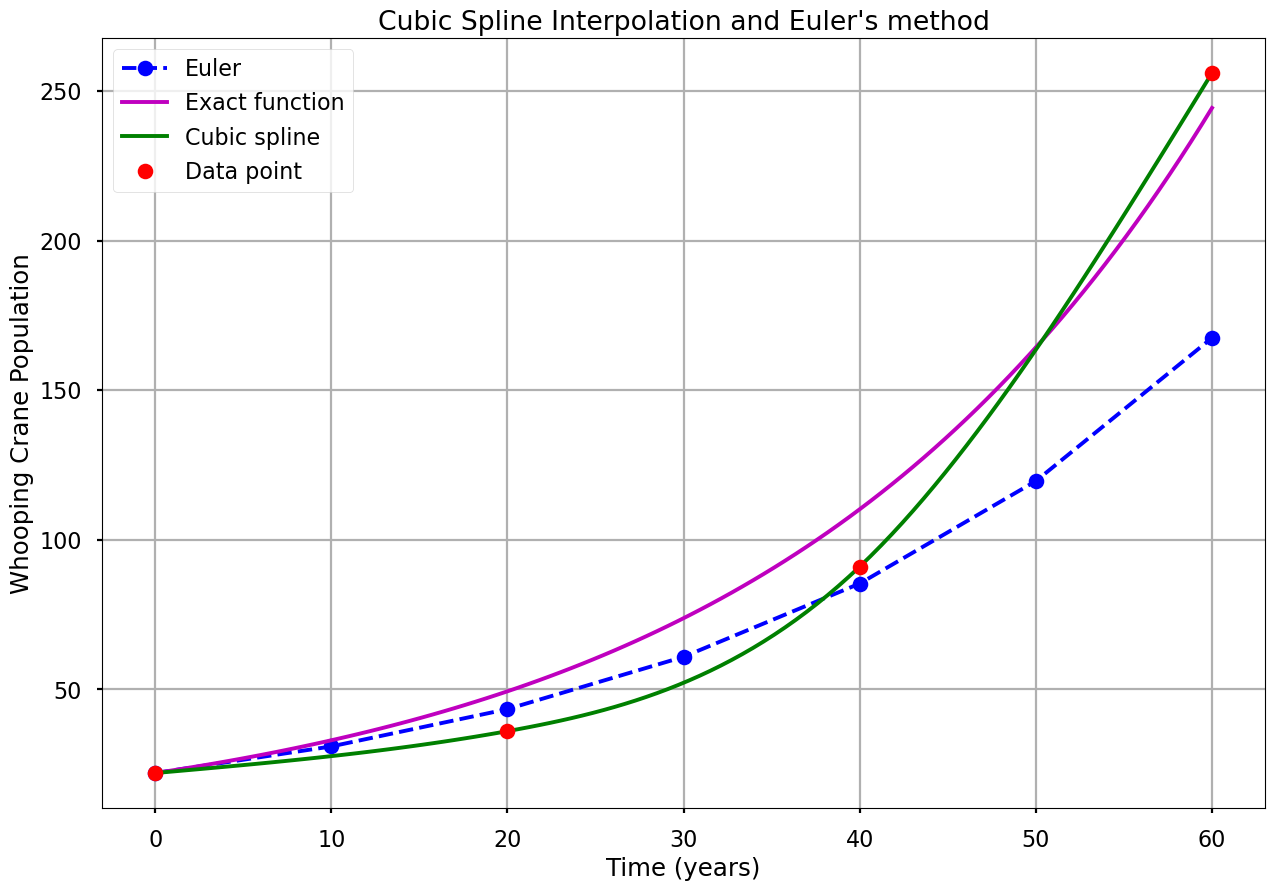

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#Cubic Spline from data point t and y
t = np.array( [0, 20, 40, 60])#t from output1
y = np.array( [22,36,91,256])  #population from experiment
f = CubicSpline(t, y, bc_type='natural') #Cubic Spline Interpolation

#Cubic Spline equation
for j in range(f.c.shape[1]):
    a_j = f.c.item(3, j)
    b_j = f.c.item(2, j)
    c_j = f.c.item(1, j)
    d_j = f.c.item(0, j)
    t_low = t[j]
    t_high = t[j+1]
    
    equation = f'S{j}({t_low}< t<={t_high}) = {a_j:.5f} + {b_j:.5f}(t-{t_low}) + {c_j:.5f}(t-{t_low})^2  + {d_j:.5f}(t-{t_low})^3'
   
    print(equation) #<< Cubic Spline polynomials
    
    
#exact funtion
def z(a):
    return 10000/(1+(453.54545*np.exp(-0.0405*a))) #<<Exact function in a terms

#y(20) exact
print('y(20) Exact={:.5f}'.format(z(20)))

#plot graph exact funtion
t_plot = np.linspace(t[0], t[-1], 100)

y_exact = 10000/(1+(453.54545*np.exp(-0.0405*t_plot)))

#Euler's method
def func( t_euler, y_euler ):
    return 0.0405*(1-(y_euler/10000))*y_euler #<<dy/dt in t_euler and y_euler terms 
     

def euler( a0, y_euler, h, t_euler ):
    temp = -0
 

    while a0 < t_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h

        #T(10) Euler's method 
    print("y(20) Euler = ","%.5f"% y_euler)
    return y_euler

a0 = 0 #<<t=0
b0 = 22  #<< T(0)=22
h = 10 #<<step size
 
t_euler = 20 #<<approxination Euler y(20)
 
y_euler = euler(a0, b0, h, t_euler)


error = abs(z(20) - y_euler)
#Error Euler's method 
print("Error Euler = ", "%.5f" % error)
#y(10) Cubic spline
print('y(20) Cubic Spline = {:.5f}'.format(f(20)))
#Error Cubic spline
print('Error Cubic Spline={:.5f}'.format(abs(z(20)-f(20))))


plt.style.use('seaborn-poster')



f1 = lambda w, s: 0.0405*(1-(s/10000))*s #<<dy/dt in s and w terms 
h = 10 #<<step size
w = np.arange(0, 60 + h, h) #<<t0 is 0 ,t3 is 60


s0 = 22 #<<y(0)=22

s = np.zeros(len(w))
s[0] = s0

for i in range(0, len(w) - 1):
    s[i + 1] = s[i] + h*f1(w[i], s[i])
w_1 = np.where((w >= 0) & (w <= 60))
    
t_new =np.linspace(t[0], t[-1], 100)
y_new = f(t_new)

#plot graph
plt.figure(figsize = (15,10))
plt.grid()
plt.plot(w[w_1], s[w_1], 'bo--', label='Euler')
plt.plot(t_plot,y_exact, 'm',  label='Exact function')
plt.plot(t_new, y_new, 'g', label='Cubic spline')
plt.plot(t, y, 'ro',label='Data point')
plt.title('Cubic Spline Interpolation and Euler\'s method')
plt.xlabel('Time (years)')
plt.ylabel('Whooping Crane Population')
plt.legend(loc='upper left')
plt.show()

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import re

def func( t_euler, y_euler ):
    return 0.0405*(1-(y_euler/10000))*y_euler  #<<dy/dt in t_euler and y_euler terms
     

def euler( a0, y_euler, h, t_euler ):
    while a0 < t_euler:
        temp = y_euler
        y_euler =y_euler + h * func(a0, y_euler)
        a0 = a0 + h

    return y_euler

a0 = 0 #<<t=0
b0 = 22  #<< y(0)=22
h = 10 #<<step size

t_euler_values = np.arange(0, 60+h, h) #<<t0=0 and t3=60

t_values = []
euler_values = []
error_euler = []
s_values = []
error_cs = []
exact_values = []
error_values=[]

def z(a):
    return 10000/(1+(453.54545*np.exp(-0.0405*a)))

t = np.array( [0, 20, 40, 60])#t from output1
y = np.array( [22,36,91,256])  #opoulation from experiment
cs = CubicSpline(t, y, bc_type='natural') #Cubic Spline Interpolation

for i in np.arange(0, 60+h, h):#<<t0=0 and t3=60 in step1
    
    error = abs(z(i)-cs(i))
    error_values.append(float("{:.5f}".format(error)))

for t in t_euler_values:
    y_euler = euler(a0, b0, h, t)
    error = abs(z(t) - y_euler)
    s = np.round(cs(t), 5)
    t_values.append(t)
    euler_values.append(float("{:.5f}".format(y_euler)))
    error_euler.append(float("{:.5f}".format(error)))
    s_values.append(float("{:.5f}".format(s)))


t_values = [float("{:.5f}".format(t)) for t in t_values]
exact_values = [float("{:.5f}".format(t)) for t in exact_values]
euler_values = [float("{:.5f}".format(t)) for t in euler_values]
error_euler = [float("{:.5f}".format(t)) for t in error_euler]
s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print('{',end='')   
print("'t' : ", t_values,end='')
print(',')

error_eulervalues=[]
errorexactvalues=[]

for t in t_euler_values:
    exact_values.append(round(z(t),5))
    
y =  [22,np.nan,36,np.nan,91,np.nan,256] #y(t) population from experiment at t=[0,20,40,60]

print("'test' :",y,end='')
print(',')
print("'Exact' :",exact_values,end='')
print(',')
print("'Euler' : ", euler_values,end='')
print(',')
print("'Cubic Spline': ", s_values,end='')
print(',')


for t_euler in t_euler_values:
    t_values.append(round(t_euler, 5))
    y_euler = euler(a0, b0, h, t_euler)
    erroreuler = abs(z(t_euler) - y_euler)
    error_eulervalues.append(round(erroreuler, 5))

print("'Error Euler': ", error_eulervalues,end='')
print(',')




for t_euler in t_euler_values:
    s = np.round(cs(t_euler), 5)
    s_values.append(float("{:.5f}".format(s)))
    error_cs.append(abs(z(t_euler)-s))

s_values = [float("{:.5f}".format(t)) for t in s_values]
error_cs = [float("{:.5f}".format(t)) for t in error_cs]

print("'Error Cubic Spline':", str(error_cs).replace("'", ""),end='')
print('}')

{'t' :  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0],
'test' : [22, nan, 36, nan, 91, nan, 256],
'Exact' : [22.0, 32.94846, 49.31858, 73.76183, 110.18549, 164.29748, 244.3273],
'Euler' :  [22.0, 30.8904, 43.36236, 60.84797, 85.34145, 119.60976, 167.4723],
'Cubic Spline':  [22.0, 27.65, 36.0, 52.175, 91.0, 163.525, 256.0],
'Error Euler':  [0.0, 2.05806, 5.95621, 12.91386, 24.84404, 44.68771, 76.855],
'Error Cubic Spline': [0.0, 5.29846, 13.31858, 21.58683, 19.18549, 0.77248, 11.6727]}


In [6]:
from IPython.display import display
import numpy as np
import pandas as pd
nan=np.nan
# creating a DataFrame
dict ={'t' :  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0],
'test' : [22, nan, 36, nan, 91, nan, 256],
'Exact' : [22.0, 32.94846, 49.31858, 73.76183, 110.18549, 164.29748, 244.3273],
'Euler' :  [22.0, 30.8904, 43.36236, 60.84797, 85.34145, 119.60976, 167.4723],
'Cubic Spline':  [22.0, 27.65, 36.0, 52.175, 91.0, 163.525, 256.0],
'Error Euler':  [0.0, 2.05806, 5.95621, 12.91386, 24.84404, 44.68771, 76.855],
'Error Cubic Spline': [0.0, 5.29846, 13.31858, 21.58683, 19.18549, 0.77248, 11.6727]}#The data from output 3 and the experimental results are summarized in the table.
df = pd.DataFrame(dict)
# displaying the DataFrame
display(df)

,t,test,Exact,Euler,Cubic Spline,Error Euler,Error Cubic Spline
0,0.0,22.0,22.00000,22.00000,22.000,0.00000,0.00000
1,10.0,NaN,32.94846,30.89040,27.650,2.05806,5.29846
2,20.0,36.0,49.31858,43.36236,36.000,5.95621,13.31858
3,30.0,NaN,73.76183,60.84797,52.175,12.91386,21.58683
4,40.0,91.0,110.18549,85.34145,91.000,24.84404,19.18549
5,50.0,NaN,164.29748,119.60976,163.525,44.68771,0.77248
6,60.0,256.0,244.32730,167.47230,256.000,76.85500,11.67270
